In [73]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')

In [8]:
# automobile_df = automobile_df.replace("?",np.nan)

In [10]:
# automobile_df.isna().sum()

In [ ]:
# automobile_df = automobile_df.dropna()

In [11]:
automobile_df.shape

(398, 9)

In [18]:
automobile_df.drop(
    ['origin','car name'],axis=1,inplace=True
)

In [19]:
automobile_df['model year'] = '19' + automobile_df['model year'].astype('str')

In [20]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
353,33.0,4,105.0,74,2190,14.2,1981
379,36.0,4,98.0,70,2125,17.3,1982
151,31.0,4,79.0,67,2000,16.0,1974
21,24.0,4,107.0,90,2430,14.5,1970
269,30.9,4,105.0,75,2230,14.5,1978


In [26]:
automobile_df['age'] = datetime.datetime.now().year - automobile_df['model year'].astype('int')
# automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model_year'])


In [25]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,52
1,15.0,8,350.0,165,3693,11.5,1970,52
2,18.0,8,318.0,150,3436,11.0,1970,52
3,16.0,8,304.0,150,3433,12.0,1970,52
4,17.0,8,302.0,140,3449,10.5,1970,52


In [27]:
automobile_df.drop(
    ['model year'],axis=1,inplace=True
)

ValueError: Unable to parse string "?" at position 32

In [33]:
automobile_df.loc[automobile_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
32,25.0,4,98.0,?,2046,19.0,51
126,21.0,6,200.0,?,2875,17.0,48
330,40.9,4,85.0,?,1835,17.3,42
336,23.6,4,140.0,?,2905,14.3,42
354,34.5,4,100.0,?,2320,15.8,41
374,23.0,4,151.0,?,3035,20.5,40


In [52]:
automobile_df.horsepower.replace("?",np.nan,inplace=True)

In [35]:
automobile_df['horsepower'] = pd.to_numeric(automobile_df.horsepower)

In [36]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,45.989950
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,40.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,43.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,46.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,52.000000


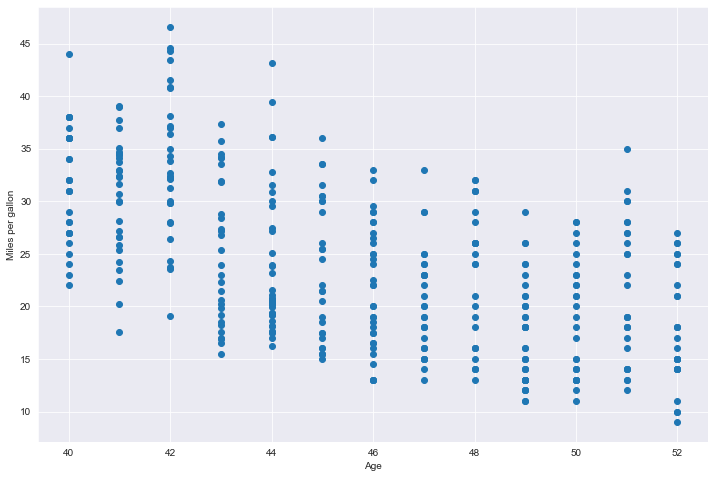

In [37]:
fig, ax =plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['age'],automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per gallon')
plt.show()

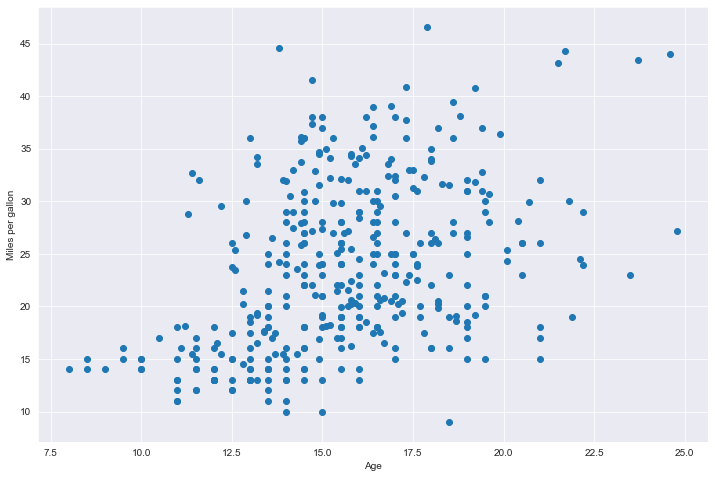

In [38]:
fig, ax =plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['acceleration'],automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per gallon')
plt.show()

Text(0, 0.5, 'Miles per gallon')

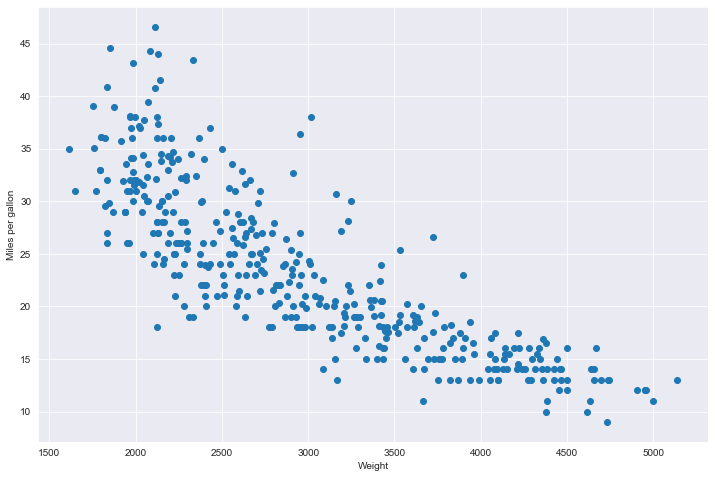

In [39]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['weight'],automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

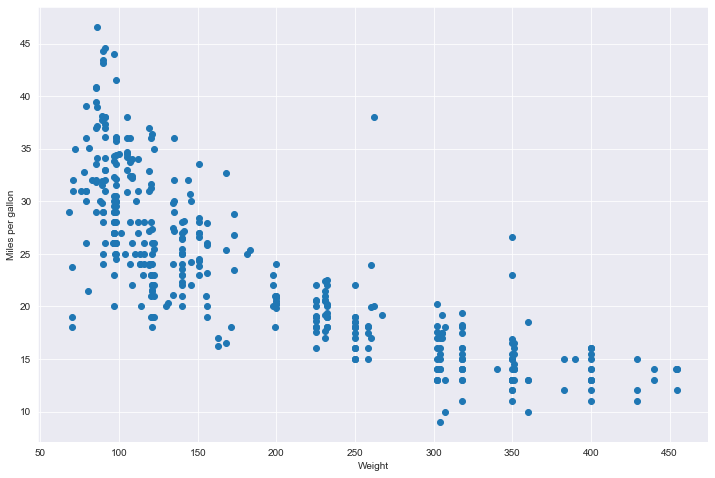

In [40]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['displacement'],automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

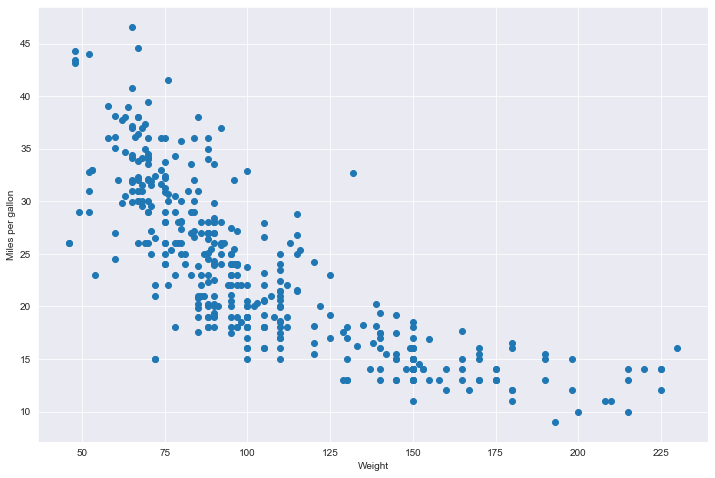

In [41]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['horsepower'],automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

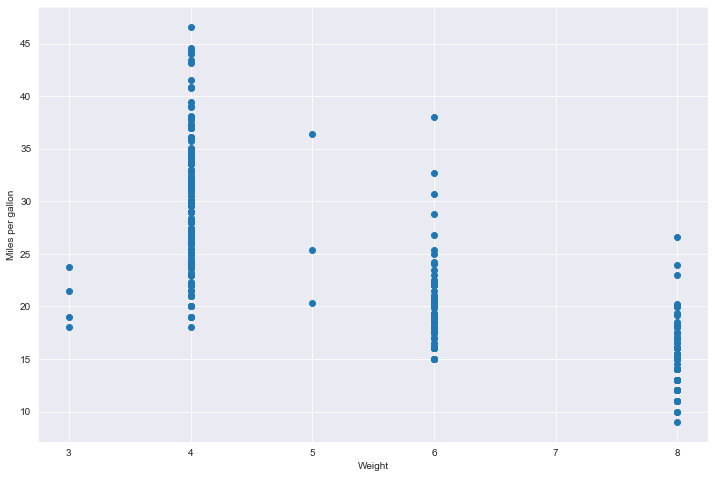

In [42]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(automobile_df['cylinders'],automobile_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

In [43]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,-0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,-0.288137
age,-0.579267,0.348746,0.370164,0.416361,0.306564,-0.288137,1.000000


<AxesSubplot:>

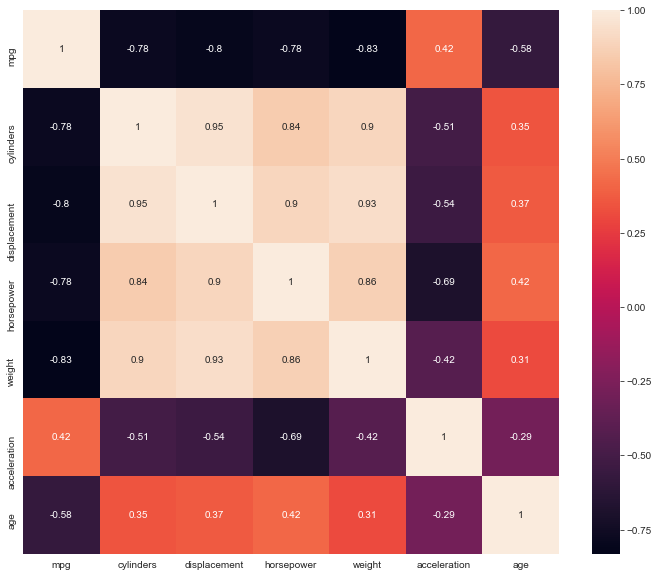

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(automobile_corr,annot=True)

In [47]:
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,15.5,8,350.0,170.0,4165,11.4,45
1,18.0,6,250.0,105.0,3459,16.0,47
2,13.0,8,302.0,129.0,3169,12.0,47
3,23.0,4,97.0,54.0,2254,23.5,50
4,37.0,4,85.0,65.0,1975,19.4,41


# Linear Regression

In [49]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,15.5,8,350.0,170.0,4165,11.4,45
1,18.0,6,250.0,105.0,3459,16.0,47
2,13.0,8,302.0,129.0,3169,12.0,47
3,23.0,4,97.0,54.0,2254,23.5,50
4,37.0,4,85.0,65.0,1975,19.4,41


In [50]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   age           398 non-null    int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 20.3 KB


In [60]:
automobile_df.drop(
    automobile_df.loc[automobile_df.horsepower.isnull()].index.tolist(),
    inplace=True
)

In [62]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 23.0 KB


In [63]:
X = automobile_df[['horsepower']]
X.shape

(392, 1)

In [64]:
Y = automobile_df['mpg']
Y.shape

(392,)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [68]:
    automobile_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,15.5,8,350.0,170.0,4165,11.4,45
1,18.0,6,250.0,105.0,3459,16.0,47
2,13.0,8,302.0,129.0,3169,12.0,47


In [67]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [70]:
f'Training R2 Score: {linear_model.score(x_train,y_train)}'

'Training R2 Score: 0.5963479852536002'

In [71]:
y_pred = linear_model.predict(x_test)

In [72]:
f'Test R2 Score: {linear_model.score(x_test,y_test)}'

'Test R2 Score: 0.646875315044005'

In [75]:
f'Testing Score: {r2_score(y_test,y_pred)}'

'Testing Score: 0.646875315044005'

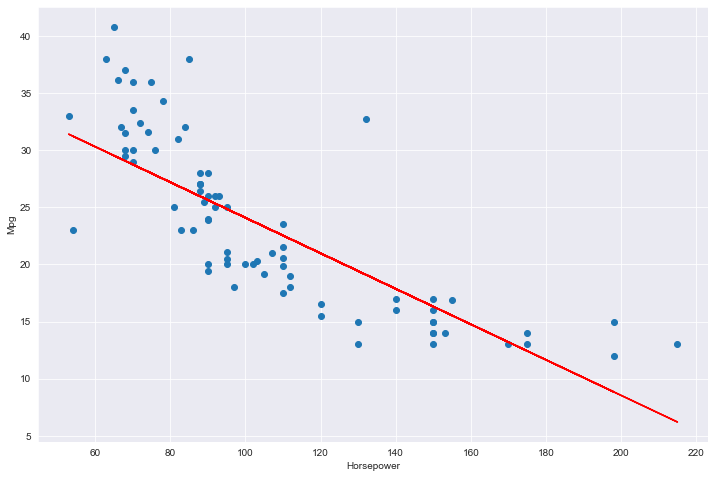

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

In [89]:
X = automobile_df[['age']]
Y = automobile_df.mpg

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [85]:
f'Training score: {linear_model.score(x_train,y_train)}'

'Training score: 0.3514103727109599'

In [87]:
f'Testing score: {linear_model.score(x_test,y_test)}'

'Testing score: 0.2562200138946933'

In [90]:
y_pred = linear_model.predict(x_test)

In [91]:
f'Testing score: {r2_score(y_test,y_pred)}'

'Testing score: 0.14366502694086447'

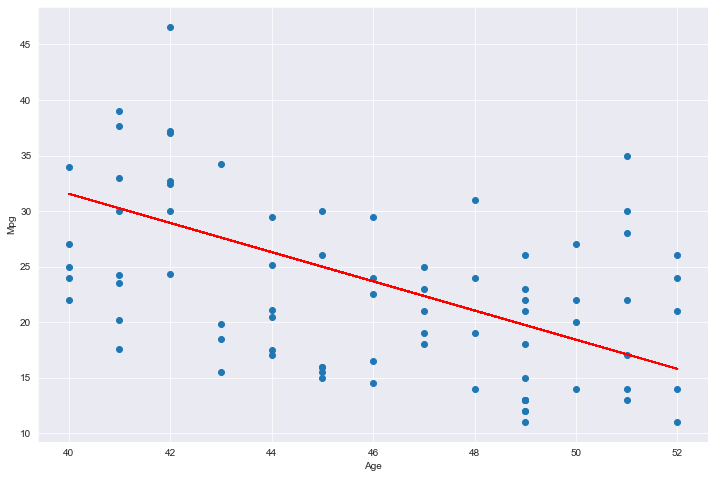

In [92]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

# Multiple Linear Regression

In [94]:
X = automobile_df[['displacement','horsepower','weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [95]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [96]:
f'Training score: {linear_model.score(x_train,y_train)}'

'Training score: 0.6988147559672704'

In [98]:
pd.DataFrame({
    'Feature':X.columns,
    'Coefficient':linear_model.coef_
})

,Feature,Coefficient
0,displacement,-0.005362
1,horsepower,-0.052113
2,weight,-0.005009


In [99]:
y_pred = linear_model.predict(x_test)

In [100]:
f'Testing score: {r2_score(y_test,y_pred)}'

'Testing score: 0.7345257115086518'

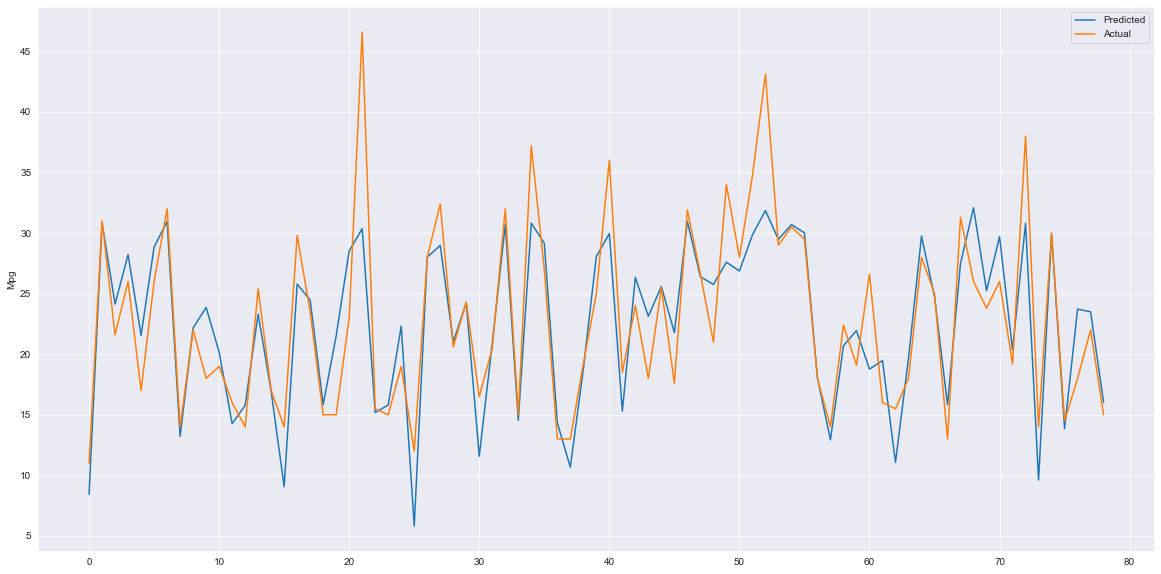

In [102]:
plt.figure(figsize=(20,10))
plt.plot(y_pred,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('Mpg')
plt.legend()
plt.show()

# Linear Regression with Categorical Value

In [103]:
exam_df = pd.read_csv('datasets/exams.csv')

In [104]:
exam_df.sample(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
45,female,group D,some college,standard,none,73,81,78
51,male,group D,high school,standard,completed,62,62,58
11,male,group A,associate's degree,free/reduced,completed,75,80,84
57,female,group D,master's degree,standard,none,48,67,64


### standardizing

In [107]:
from sklearn import preprocessing

In [112]:
for i in exam_df.columns[-3:].tolist():
    exam_df[i] = preprocessing.scale(exam_df[i]).astype('float64')

In [113]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.753353e-16,-3.004541e-16,-4.912737e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.133149e+00,-3.291909e+00,-3.317542e+00
25%,-5.613050e-01,-6.572107e-01,-4.820360e-01
50%,1.459522e-01,1.112428e-01,-9.451687e-03
75%,7.406911e-01,7.333242e-01,8.006929e-01
max,1.881947e+00,1.757929e+00,1.610838e+00


### convert categorical to numerical
* ordinal categorical , labelencoder
* nominal categorical , one hot

In [116]:
edu_list = exam_df['parental level of education'].unique().tolist()

In [118]:
edu_list = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [119]:
label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(edu_list)

In [129]:
exam_df['parental level of education'] = label_encoding.transform(
    exam_df['parental level of education']
)

In [128]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [130]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,0,standard,none,0.210248,0.440580,-0.009452
1,female,group C,4,standard,none,-1.268562,-1.315885,-1.292181
2,male,group E,2,standard,none,0.531729,0.147836,-0.076964
3,female,group B,4,free/reduced,completed,-1.461450,-1.315885,-1.022132
4,female,group B,1,standard,completed,0.017360,0.440580,0.733181


In [131]:
exam_df = pd.get_dummies(
    exam_df,
    columns=['race/ethnicity']
)


In [132]:
exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,0.210248,0.440580,-0.009452,0,0,0,0,1
1,female,4,standard,none,-1.268562,-1.315885,-1.292181,0,0,1,0,0
2,male,2,standard,none,0.531729,0.147836,-0.076964,0,0,0,0,1
3,female,4,free/reduced,completed,-1.461450,-1.315885,-1.022132,0,1,0,0,0
4,female,1,standard,completed,0.017360,0.440580,0.733181,0,1,0,0,0


In [133]:
exam_df = pd.get_dummies(
    exam_df,
    columns=['gender','lunch','test preparation course']
)

In [134]:
exam_df

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,0.210248,0.440580,-0.009452,0,0,0,0,1,1,0,0,1,0,1
1,4,-1.268562,-1.315885,-1.292181,0,0,1,0,0,1,0,0,1,0,1
2,2,0.531729,0.147836,-0.076964,0,0,0,0,1,0,1,0,1,0,1
3,4,-1.461450,-1.315885,-1.022132,0,1,0,0,0,1,0,1,0,1,0
4,1,0.017360,0.440580,0.733181,0,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,-0.754193,-1.681815,-2.034813,0,0,1,0,0,0,1,1,0,0,1
96,0,-0.497009,-0.949955,-1.427205,0,0,1,0,0,0,1,0,1,0,1
97,1,-0.175528,0.879696,0.665669,0,0,1,0,0,1,0,1,0,0,1
98,0,0.081656,0.001464,-0.009452,0,1,0,0,0,0,1,0,1,0,1


In [135]:
X = exam_df.drop('math score',axis=1)
Y = exam_df['math score']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### one hot encoding , dummy trap
fit_intercept = False

In [136]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
# dummy variable trap occur when there is perfect collinearity
# one hot encoding , set fit_intercept to true , this might cause perfect collinearity in the model

In [139]:
f'Training score: {linear_model.score(x_train,y_train)}'

'Training score: 0.8949334276757003'

In [138]:
y_pred = linear_model.predict(x_test)

In [140]:
f'Testing score: {r2_score(y_test,y_pred)}'

'Testing score: 0.7885328655509714'

In [141]:
pd.DataFrame({
    'y_test':y_test,
    'y_pred':y_pred
})

,y_test,y_pred
44,-0.175528,-0.500980
14,0.853209,1.019543
80,0.210248,0.238716
20,0.917505,0.887984
54,0.917505,0.704452
37,-0.625601,-1.122041
51,-0.304121,-0.421887
5,-1.075674,-1.375251
0,0.210248,0.184992
83,0.403137,-0.121957


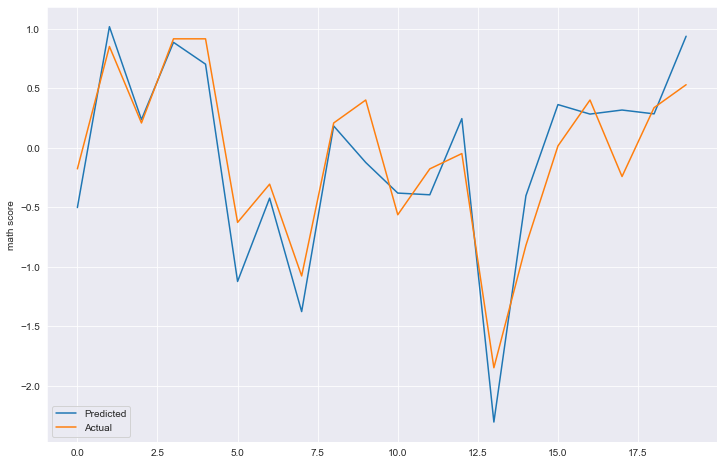

In [144]:
plt.figure(figsize=(12,8))
plt.plot(y_pred,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('math score')
plt.legend()
plt.show()

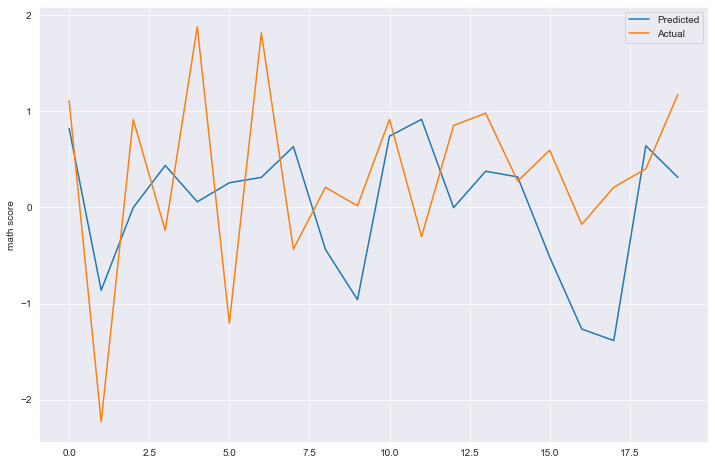

In [145]:
X = exam_df.drop(['math score','writing score','reading score'],axis=1)
Y = exam_df['math score']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
linear_model = LinearRegression(fit_intercept=True).fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
plt.figure(figsize=(12,8))
plt.plot(y_pred,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('math score')
plt.legend()
plt.show()
